### A Note on the files used in this project:
`main.py` contains the "executable" portion of this program, i.e. things like:
  - Setting up variables
  - Initializing the plotting frontend
  - The actual plotting or saving to a file

`regression.py` contains the math behind it all. It's main purpose is to be a toolbox of different types of regression.

`util.py` contains everything else.

# Initialization
We first need to import some of the things we implemented.
Let's start with a simple graph containing a function, like $f(x)=\frac{1}{3}x^2$

In [1]:
from util import Plotter
f = lambda x: x**2/3

Next, we do the plotting:

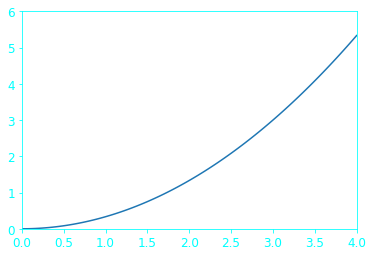

In [2]:
plotter = Plotter()
plotter.plot_func(f)
plotter.show()

So far so easy, right? We can also change a few things about how our plotter plots, like the scale of our axes, when we create it:

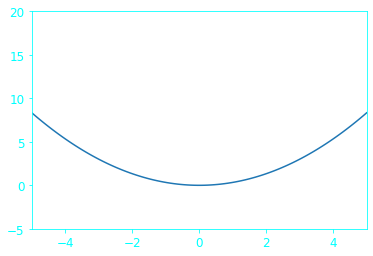

In [3]:
scaled_plotter = Plotter(xmin=-5, xmax=5, ymin=-5, ymax=20)
scaled_plotter.plot_func(f)
scaled_plotter.show()

Since we are going to cover regression, we need to start with an easy way of obtaining data.

We do this with the help of `get_datapts()` from our `Plotter` class.

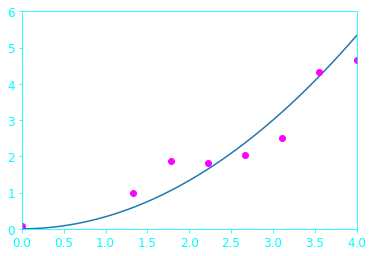

In [4]:
pts = plotter.get_datapts(f, 10, 2, seed=0)
plotter.plot_pts(*pts, 'o', color='magenta')
plotter.show()

Making regression happen:

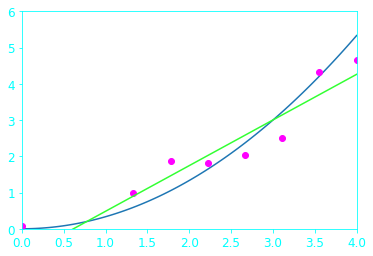

In [5]:
from regression import regression

regressor = regression(pts)
plotter.plot_func(regressor, color=(.2,1,.2))
plotter.show()

As you can see, this approximation is quite good, since there is almost no difference between the blue (regressand) and the green (regressor) line.

In order to better illustrate the error, we can use some number magic with the help of numpy as a shorthand:

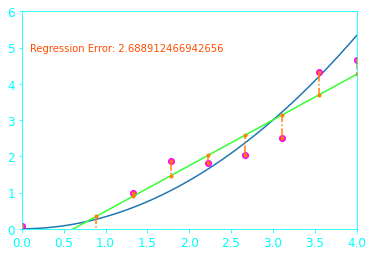

In [6]:
from numpy import vstack
xvals, yvals = pts
xx = vstack([xvals, xvals])
yy = vstack([yvals, regressor(xvals)])
plotter.plot_pts(xx, yy, ".-.", color=(1, 0.5, 0))
plotter.measure_error(regressor, pts)
plotter.show()

What you can see here is a visualisation of $$\sum_{0..i..n}\left|f(x_i)-y_i\right|$$ Or in other words: if you sum the distances represented by the orange lines, you end up with the error of our approxiamtion. Mind you that the error is typically not just an absolute value, but instead gets sqaured, so we would end up with $$\sum_{0..i..n}\left(f(x_i)-y_i\right)^2$$ instead.

## Interpolation
We will now show an example of interpolation using lagrange polynomials.

First, we call the `reset()` function of the plotter object, because we dont want all the junk from above to show up in our plot again.

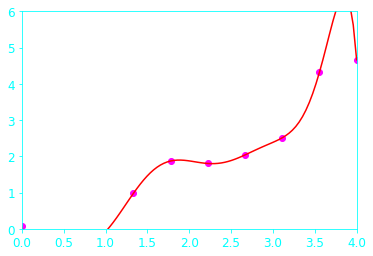

In [7]:
from scipy.interpolate import lagrange
plotter.reset()
plotter.plot_pts(*pts, 'o', color='magenta')
plotter.plot_func(lagrange(*pts), 'r')
plotter.show()

Admittedly, while looking pretty nice and reducing our error to exactly zero (by definition of the interpolation statement), this is not helpful.

This becomes quite apparent when we 'zoom out' a bit:

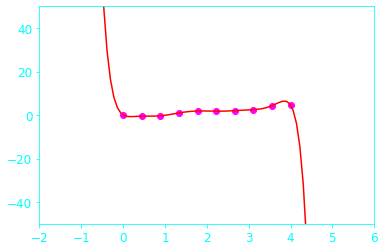

In [8]:
plotter.XMIN, plotter.XMAX = -2, 6
plotter.YMIN, plotter.YMAX = -50, 50
plotter.show()

As you can see, while the function matches the data set perfectly, it is useless as a form of prediction.

Having given two examples for possible regressions (one good, one not-so-good), we would like to end with two more from the world of trigonometry:

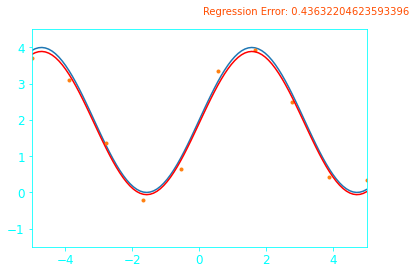

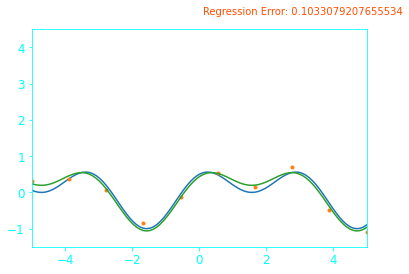

In [9]:
from numpy import sin, cos
from regression import trig_regression_ez, trig_regression_nonlinear

# Example using the model a + b * sin(x)

def func(x):
    return 2 + 2 * sin(x)

trigpltr = Plotter(-5, 5, -1.5, 4.5, errmin=[-.3], errmax=[.3])
trigpts = trigpltr.get_datapts(func, 10, 2, seed=0)

trigpltr.plot_func(func)
trigpltr.plot_pts(*trigpts, '.')

linear_trig_regressor = trig_regression_ez(trigpts)
trigpltr.plot_func(linear_trig_regressor, color = (1,0,0))
trigpltr.measure_error(linear_trig_regressor, trigpts)
trigpltr.show()

# Example using the NON-LINEAR model a * sin(wx) + b * cos(ox), with a set w and o because this cannot be determined linearly

def nonlinear_func(x):
    return .5 * sin(x) + .5 * cos(2*x)

trigpltr.reset()
trigpts = trigpltr.get_datapts(nonlinear_func, 10, 2, seed=0)

trigpltr.plot_func(nonlinear_func)
trigpltr.plot_pts(*trigpts, '.')

nonlinear_trig_regessor = trig_regression_nonlinear(trigpts, 1, 2)
trigpltr.plot_func(nonlinear_trig_regessor)
trigpltr.measure_error(nonlinear_trig_regessor, trigpts)
trigpltr.show()